In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data=pd.read_csv('CKD.csv')
data=pd.get_dummies(data,drop_first=True)
data

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,0,0,0,0,0,0,1,1,0,1
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,1,0,0,0,0,0,1,0,0,1
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,1,0,0,0,0,0,1,0,0,1
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,1,0,0,0,0,0,1,0,1,1
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,1,0,0,0,0,0,1,0,0,1
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,1,0,0,1,1,0,1,0,1,1
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,1,0,0,1,1,0,0,0,0,1
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,1,0,0,1,1,0,1,0,1,1


In [3]:
indep=data.drop('classification_yes',axis=1)
dep=data['classification_yes']

In [9]:
def split_scaler(indep,dep):
    x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.25,random_state=0)
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.transform(x_test)
    return x_train,x_test,y_train,y_test

In [5]:
def cm_prediction(classifier,x_test):
    y_pred=classifier.predict(x_test)

    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    accuracy=accuracy_score(y_test,y_pred)
    report= classification_report(y_test,y_pred)
    return cm,accuracy,report,x_test,y_test,classifier

In [20]:
#finding feature selection for Random Forest
x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.25,random_state=0)                             
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=10,criterion='entropy')
rf.fit(x_train,y_train)
importances= rf.feature_importances_
for feature, importance in zip(indep, importances):
    print(feature, importance)

age 0.021333750344613395
bp 0.013798050002695099
al 0.09128010165317864
su 0.0
bgr 0.01799304660168433
bu 0.037077092254073477
sc 0.07516986657214006
sod 0.06526968599674118
pot 0.011146834871687071
hrmo 0.16727544264279343
pcv 0.19747580323799271
wc 0.005680938971993274
rc 0.08733178420013248
sg_b 0.0011249486281091632
sg_c 0.03564016723153131
sg_d 0.012784623763168785
sg_e 0.0
rbc_normal 0.010224844578827046
pc_normal 0.010234626375608367
pcc_present 0.0028166668462287505
ba_present 0.0
htn_yes 0.08171453200158088
dm_yes 0.04844746010646919
cad_yes 0.0
appet_yes 0.002423062007590065
pe_yes 0.0037566711111614525
ane_yes 0.0


C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [21]:
df=pd.DataFrame({'Feature_Names':indep.columns,'Importances':rf.feature_importances_})

C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [25]:
df1=df.sort_values(by='Importances',ascending=False)
df1

,Feature_Names,Importances
10,pcv,0.197476
9,hrmo,0.167275
2,al,0.091280
12,rc,0.087332
21,htn_yes,0.081715
6,sc,0.075170
7,sod,0.065270
22,dm_yes,0.048447
5,bu,0.037077
14,sg_c,0.035640


<BarContainer object of 27 artists>

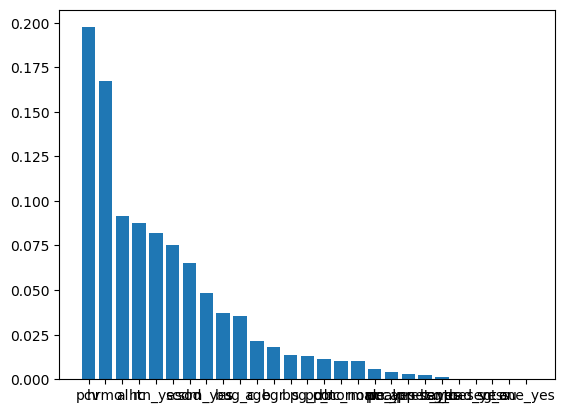

In [26]:
import matplotlib.pyplot as plt
plt.bar(df1['Feature_Names'],df1['Importances'])


# using Decision Tree


In [27]:
from sklearn.tree import DecisionTreeClassifier
des = DecisionTreeClassifier(criterion='entropy')
des .fit(x_train,y_train)
importances= des.feature_importances_
for feature, importance in zip(indep, importances):
    print(feature, importance)

age 0.012832253902731393
bp 0.01635718439896191
al 0.0
su 0.0
bgr 0.10047137309422971
bu 0.03681327598886253
sc 0.08853826610197649
sod 0.0
pot 0.0
hrmo 0.6494062206622117
pcv 0.0
wc 0.0
rc 0.027605636643417107
sg_b 0.0
sg_c 0.06797578920760912
sg_d 0.0
sg_e 0.0
rbc_normal 0.0
pc_normal 0.0
pcc_present 0.0
ba_present 0.0
htn_yes 0.0
dm_yes 0.0
cad_yes 0.0
appet_yes 0.0
pe_yes 0.0
ane_yes 0.0


In [29]:
dfdes=pd.DataFrame({'Feature_Names':indep.columns,'Importances':des.feature_importances_})
dfdes1=dfdes.sort_values(by='Importances',ascending=0)
dfdes1

,Feature_Names,Importances
9,hrmo,0.649406
4,bgr,0.100471
6,sc,0.088538
14,sg_c,0.067976
5,bu,0.036813
12,rc,0.027606
1,bp,0.016357
0,age,0.012832
20,ba_present,0.000000
19,pcc_present,0.000000


<BarContainer object of 27 artists>

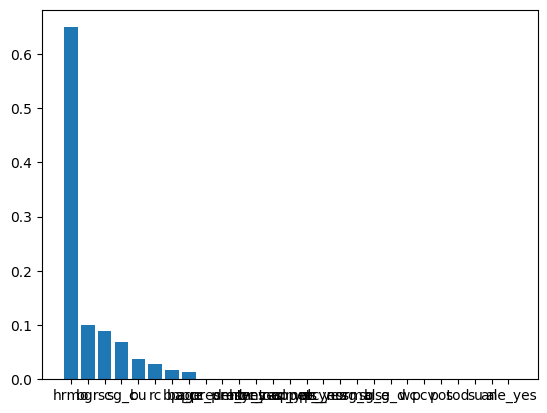

In [30]:
plt.bar(dfdes1['Feature_Names'],dfdes1['Importances'])

# using Linear model

In [65]:
from sklearn.linear_model import LogisticRegression
logistic =LogisticRegression()
logistic.fit(x_train,y_train)
importances=logistic.coef_[0]

C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
for coef, importance in zip(indep, importances):
    print(coef, importance)

age -0.004737996822170908
bp 0.05980420520193893
al 1.0679103705948836
su 0.15197284643687353
bgr 0.03352132033444982
bu -0.006872042779348639
sc 1.1049997840685408
sod 0.07134146772008913
pot -0.04634359571742511
hrmo -0.9320922780391359
pcv -0.11250486179249598
wc -2.0306409577960843e-05
rc -0.44773513733026177
sg_b -0.643774923596453
sg_c 0.5158484425507025
sg_d 0.31250595713780255
sg_e 0.016751286884559024
rbc_normal -0.20643720179854655
pc_normal -0.11764998360754095
pcc_present 0.03242796367149462
ba_present 0.006369615908365525
htn_yes 0.45223101249024283
dm_yes 0.3789766417000695
cad_yes 0.023534843423028338
appet_yes -0.21452687669097803
pe_yes 0.4193998895717817
ane_yes 0.165795230966496


In [69]:
dflog=pd.DataFrame({'Feature_Names':indep.columns,'Importances':logistic.coef_[0]})
dflog1=dflog.sort_values(by='Importances',ascending=0)
dflog1

,Feature_Names,Importances
6,sc,1.105000
2,al,1.067910
14,sg_c,0.515848
21,htn_yes,0.452231
25,pe_yes,0.419400
22,dm_yes,0.378977
15,sg_d,0.312506
26,ane_yes,0.165795
3,su,0.151973
7,sod,0.071341


<BarContainer object of 27 artists>

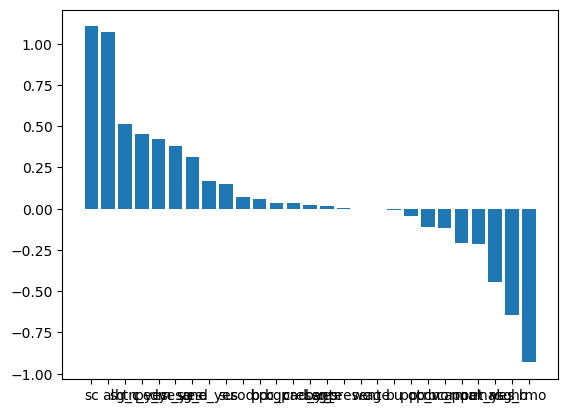

In [70]:
plt.bar(dflog1['Feature_Names'],dflog1['Importances'])